In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('../data/cleaned_train.csv')
train

,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,HISTOLOGY,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,Class,OneHotSex
0,1,0,1,1,0,0,1,0,1,1,1,0,0.661290,0.584416,0.411504,0.541667,0.18750,0.31,DIE,1.0
1,0,0,1,0,0,0,1,1,1,0,1,0,0.709677,0.090909,0.333702,0.022727,0.28125,0.63,LIVE,1.0
2,1,0,1,0,0,0,1,0,0,0,0,1,0.532258,0.038961,0.141593,0.575758,0.59375,0.63,LIVE,1.0
3,0,0,1,0,0,1,1,1,1,1,1,0,0.290323,0.129870,0.668142,0.632576,0.75000,0.57,LIVE,1.0
4,1,0,1,0,0,1,1,0,1,0,0,1,0.435484,0.090909,0.185841,0.121212,0.71875,0.57,LIVE,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0,0,1,1,1,0,0,1,0,0,0,1,0.258065,0.129870,0.725664,0.515152,0.62500,0.90,LIVE,1.0
98,1,0,0,0,0,0,1,0,0,0,0,0,0.500000,0.012987,0.942478,0.132576,0.53125,0.90,DIE,1.0
99,1,0,0,0,0,0,0,1,0,0,0,1,0.467742,0.064935,0.243363,0.113636,0.65625,0.85,LIVE,1.0
100,1,1,1,1,0,0,0,0,0,0,0,1,0.403226,0.090909,0.110619,0.117424,0.62500,0.56,LIVE,1.0


Name	value
12	BILIRUBIN	0.208170
15	ALBUMIN	0.204223
17	HISTOLOGY	0.089147
9	SPIDERS	0.074751
0	AGE	0.069679
13	ALK PHOSPHATE	0.060532
4	MALAISE	0.046591
3	FATIGUE	0.044963
14	SGOT	0.042315
16	PROTIME	0.038831
10	ASCITES	0.033646
8	SPLEEN PALPABLE	0.027906
7	LIVER FIRM	0.018425
5	ANOREXIA	0.012758
11	VARICES	0.009060
1	STEROID	0.008551
6	LIVER BIG	0.007851
2	ANTIVIRALS	0.002395
18	OneHotSex	0.000205

Drop Columns from X

In [231]:
X = train.copy()

for col in ['Class', 'OneHotSex', 'ANTIVIRALS', 'LIVER BIG', 'STEROID', 'VARICES', 'ANOREXIA', 'LIVER FIRM']:
    if col in train.columns:
        X = X.drop(col, axis=1)

y=train['Class']

X

,FATIGUE,MALAISE,SPLEEN PALPABLE,SPIDERS,ASCITES,HISTOLOGY,AGE,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME
0,1,1,0,1,1,0,0.661290,0.584416,0.411504,0.541667,0.18750,0.31
1,1,0,1,1,0,0,0.709677,0.090909,0.333702,0.022727,0.28125,0.63
2,1,0,0,0,0,1,0.532258,0.038961,0.141593,0.575758,0.59375,0.63
3,1,0,1,1,1,0,0.290323,0.129870,0.668142,0.632576,0.75000,0.57
4,1,0,0,1,0,1,0.435484,0.090909,0.185841,0.121212,0.71875,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...
97,1,1,1,0,0,1,0.258065,0.129870,0.725664,0.515152,0.62500,0.90
98,0,0,0,0,0,0,0.500000,0.012987,0.942478,0.132576,0.53125,0.90
99,0,0,1,0,0,1,0.467742,0.064935,0.243363,0.113636,0.65625,0.85
100,1,1,0,0,0,1,0.403226,0.090909,0.110619,0.117424,0.62500,0.56


RandomUpsampler

In [232]:
from imblearn.over_sampling import RandomOverSampler

# resample the X_train and y_train data
ros = RandomOverSampler(random_state=69)

# for now, ros is only applied on the train data
X, y = ros.fit_resample(X, y)

X.shape, y.shape

((162, 12), (162,))

Split Data set

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

Add LogisticRegression Model

In [234]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()
LogReg.fit(X_train, y=y_train)
LogReg.fit(X_test, y_test)

# Predict Y
X_train['LOGISTICMODEL'] = LogReg.predict(X_train)
X_train['LOGISTICMODEL'] = X_train['LOGISTICMODEL'].map(lambda x : 1 if x == 'DIE' else 0)

# Predict Y
X_test['LOGISTICMODEL'] = LogReg.predict(X_test)
X_test['LOGISTICMODEL'] = X_test['LOGISTICMODEL'].map(lambda x : 1 if x == 'DIE' else 0)

UMAP

In [236]:
import umap.umap_ as UMAP

reducer = UMAP.UMAP(n_components=2,random_state=69)
reducer.fit(X_train)

X_train = reducer.transform(X_train)
X_train = pd.DataFrame(X_train, columns=["UMAP_1","UMAP_2"])
X_train.head()

X_test = reducer.transform(X_test)
X_test = pd.DataFrame(X_test, columns=["UMAP_1","UMAP_2"])
X_test.head()

C:\Users\timmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,UMAP_1,UMAP_2
0,-4.945080,9.977229
1,-2.088107,12.882580
2,12.862959,9.997644
3,14.966755,9.490547
4,-1.805991,11.990149


<Axes: xlabel='UMAP_1', ylabel='UMAP_2'>

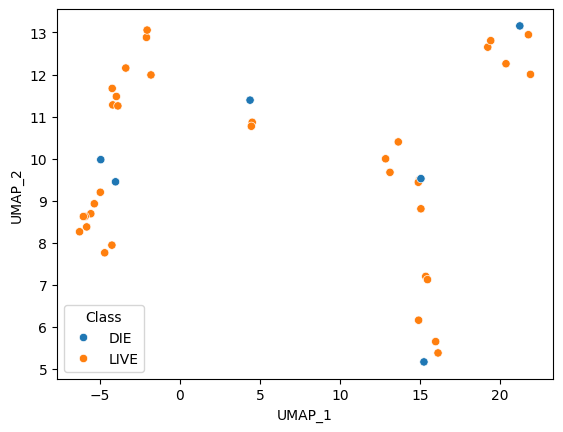

In [238]:
sns.scatterplot(x=X_test['UMAP_1'], y=X_test['UMAP_2'], hue=y)

C:\Users\timmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\manifold\_isomap.py:359: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\timmi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\sparse\_index.py:100: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


<Axes: xlabel='ISO_1', ylabel='ISO_2'>

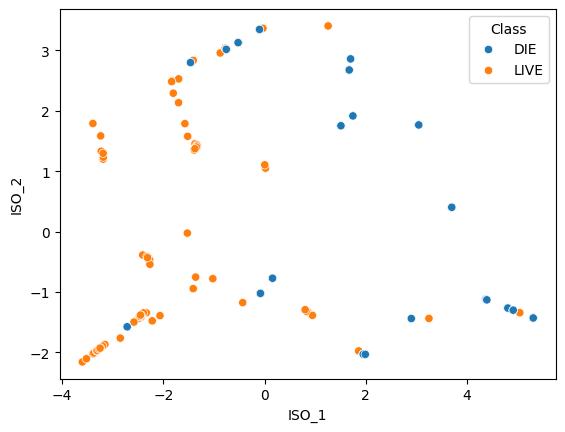

In [240]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors=12, n_components=2)
iso.fit(X_train)
X_train = iso.transform(X_train)
X_train = pd.DataFrame(X_train, columns=["ISO_1","ISO_2"])
X_train.head()

sns.scatterplot(x=X_train['ISO_1'], y=X_train['ISO_2'], hue=y)